# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [261]:
!pip install ydata_profiling

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
from google.colab import files
import re
import phik
from phik import phik_matrix
from sklearn.model_selection import GridSearchCV
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')


random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Сиды необходимо фиксировать для того, чтобы каждый раз при запуске кода получался один и тот же результат. Это важно для воспроизводимости, облегчения проверки кода и при сравнении разных моделей

### В заданиях использовался Chat GPT в роли справочника, но честно - честно со всем разбиралась и вникала в суть задач, без копипаста с закрытыми глазами. В паре задач, где полностью было скопировано, указано отдельно, но и там тоже разбиралась как это все работает.
### Хотела уточнить заранее, чтобы не было вопросов. Не ругайтесь пожалуйста <3

### Есть очень острое ощущение что я где-то могла запутаться и накосячить, особенно под конец

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [263]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [264]:
#посмотрим первые 5 строк датасета
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.00


In [265]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.00
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.00
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.00
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.00
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.00


In [266]:
#проверим есть ли в датасете пропуски и выведем столбцы с пропущенными значениями, если они есть
missing_values = df_train.isnull().sum()
missing_values[missing_values>0]

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


In [267]:
missing_values = df_test.isnull().sum()
missing_values[missing_values>0]

,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


И в train выборке, и в test, есть пропуски в пяти колонках: mileage, engine, max_power, torque и seats

In [268]:
#проверим есть ли дубликаты
print(f'В тренировочной выборке дубликатов {df_train.duplicated().sum()}, а в тестовой {df_test.duplicated().sum()}')

В тренировочной выборке дубликатов 985, а в тестовой 62


In [269]:
#построим дашборд для тренировочной выборки
train_profile = ProfileReport(df_train, title="Profiling Report")
#сохраним в HTML для удобного просмотра
train_profile.to_file("train_profile.html")
files.download("train_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 15.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [270]:
#построим дашборд для тестовой выборки
test_profile = ProfileReport(df_test, title="Profiling Report")
#сохраним в HTML для удобного просмотра
test_profile.to_file("test_profile.html")
files.download("test_profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 18.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Информация, полученная из дашбордов, позволяет сделать несколько базовых выводов:
1. Наблюдается высокая корреляция нескольких признаков, а именно: **km_driven** и **selling_price** с **year**, **selling_price** с transmission.
2. В датасете присутствуют 3 типа данных - **Text** (5 признаков), **Numeric** (4 признака) и **Categorical** (4 признака)
3. В признаке **seller_type** наблюдается сильный дисбаланс со значительным преобладанием значения "**Individual**", в признаке "**transmission**" преобладает значение "**Manual**"
4. Значительная прямая корреляция наблюдается между признаками **selling_price** и **year**, **selling_price** и **transmission**. Значительную обратную корреляцию можно выделить между признаками **km_driven** и **year**, **selling_price** и **km_driven**.
5. Меньше всего с целевой переменной коррелирует признак **fuel**, а больше всего **year**.
6. У некоторых признаков большой разброс значений. Например, **selling_price** принимает значения от 29,999 до 10,000,000, a **km_driven** от 1 до 2,360,457

Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

#### **Статистика по числовым столбцам**

In [271]:
# при выводе статистики числа вышли в экспотенциальном формате, так что заранее приводим их к обычной форме
pd.options.display.float_format = '{:.2f}'.format
# выводим статистику тренировочной выборки
df_train.describe(include = ['number'])


,year,selling_price,km_driven,seats
count,6999.00,6999.00,6999.00,6797.00
mean,2013.82,639515.20,69584.62,5.42
std,4.05,808941.91,57724.00,0.97
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,97000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [272]:
# выведем отдельно сравнение среднего и медианы
compare = pd.DataFrame({
    'mean': df_train.mean(numeric_only=True),
    'median': df_train.median(numeric_only=True),
    'difference' : df_train.mean(numeric_only=True) - df_train.median(numeric_only=True),
    'difference %' : ((df_train.mean(numeric_only=True) - df_train.median(numeric_only=True))/df_train.mean(numeric_only=True))*100
    })
compare

,mean,median,difference,difference %
year,2013.82,2015.00,-1.18,-0.06
selling_price,639515.20,450000.00,189515.20,29.63
km_driven,69584.62,60000.00,9584.62,13.77
seats,5.42,5.00,0.42,7.73


В тренировочной выборке есть сильная асимметрия в целевом признаке **selling_price**, а так же в признаке **km_driven**, что и ожидалось после анализа информации в дашборде. Так же есть умеренная асимметрия в признаке **seats**. Распределение всех трех признаков смещено вправо. Признак **year** имеет нормальное распределение.

Среднее и медиана очень сильно отличаются от максимального значения, что может говорить о сильных выбросах в данных.

In [273]:
# выводим статистику тестовой выборки
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.00,1000.00,1000.00,981.00
mean,2013.68,617901.04,71393.34,5.41
std,4.01,758553.86,48486.22,0.92
min,1995.00,31000.00,1303.00,4.00
25%,2011.00,250000.00,37000.00,5.00
50%,2014.00,434999.00,61500.00,5.00
75%,2017.00,670000.00,100000.00,5.00
max,2020.00,6000000.00,375000.00,9.00


In [274]:
# выведем отдельно сравнение среднего и медианы
compare = pd.DataFrame({
    'mean': df_test.mean(numeric_only=True),
    'median': df_test.median(numeric_only=True),
    'difference' : df_test.mean(numeric_only=True) - df_test.median(numeric_only=True),
    'difference %' : ((df_test.mean(numeric_only=True) - df_test.median(numeric_only=True))/df_test.mean(numeric_only=True))*100})
compare

,mean,median,difference,difference %
year,2013.68,2014.00,-0.32,-0.02
selling_price,617901.04,434999.00,182902.04,29.60
km_driven,71393.34,61500.00,9893.34,13.86
seats,5.41,5.00,0.41,7.59


В тестовой выборке абсолютно такая же ситуация с распределением значений числовых параметров.

Дополнительные выводы по статистике числовых столбцов:
1. Распределение тренировочной выборки и тестовой практически одинаковое. Это значит что как в тренировочной, так и в тестовой выборке значения числовых признаков примерно одинаковые. Это позволит модели обучиться более качественно.
2. Значения признаков **selling_price** и **km_driven** значительно смещены вправо. Для обучения модели необходима тщательная предобработка данных.
3. Значения **seats** возможно стоит закодировать как категориальное

#### **Статистика по категориальным столбцам**

In [275]:
# тренировочная выборка
df_train_cat_stat = df_train.select_dtypes(include=['object'])
df_train_cat_stat.describe()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [276]:
# тестовая выборка
df_test_cat_stat = df_test.select_dtypes(include=['object'])
df_test_cat_stat.describe()


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Из статистики по категориальным столбцам можно сделать следующие выводы:
1. Количество уникальных значений по признакам **fuel**, **seller_tipe**, **transmission** и **owner** совпадает. Это значит что все возможные значения признака содержатся в обеих выборках. Это будет плюсом при обучении модели, и их можно кодировать.
2. Уникальных значений name в выборках разное количество, и их очень много. Стоит подумать как именно их использовать наиболее удачно.
3. Значения признаков **mileage**, **engine**, **max_power** и torque фактически являются числовыми, а не категориальными. Имеет смысл преобразовать их в числовые.
4. Наиболее частые встречающиеся значения совпадают практически для всех признаков кроме **torque** и **name**. Судя по всему, модели авто в выборках различаются.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [277]:
df_no_target = df_train.drop('selling_price', axis=1)
print(f'В тренировочной выборке найдено {df_no_target.duplicated().sum()} объектов с одинаковым признаковым описанием.')

В тренировочной выборке найдено 1159 объектов с одинаковым признаковым описанием.


In [278]:
df_no_target[df_no_target.duplicated(keep=False)]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.00
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.00
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.00
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.00
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.00
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00


In [279]:
# удаляем дубликаты
df_train = df_train.drop_duplicates(subset=df_no_target.columns, keep='first')

# корректируем индексы строк
df_train.reset_index(drop=True, inplace=True)

In [280]:
assert df_train.shape == (5840, 13)

В данных могли бы быть скрытые дубли, например при грамматических ошибках, разном регистре или лишних символах в значениях признаков, которые не позволили бы выявить их обычной проверкой.
Признаки с небольшим количеством уникальных значений, такими как **fuel**, **seller_type**,	**transmission**,	**owner**, можно просмотреть вручную через **value_counts** и очистить при необходимости.

Для признаков с большим количеством уникальных значений для начала можно привести к нижнему регистру и одному числовому формату, убрать возможные лишние символы.

Chat GPT так же подсказал, что можно использовать библиотеки **fuzzywuzzy** и **RapidFuzz** для поиска строк, которые отличаются на 1-2 символа.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [281]:
# для обеих выборок выделим из признаков engine и max_power числовые значения и преобразуем в формат float
df_train['engine'] = df_train['engine'].str.extract(r'([-+]?\d*\.?\d+)').astype(float)
df_train['max_power'] = df_train['max_power'].str.extract(r'([-+]?\d*\.?\d+)').astype(float)

df_test['engine'] = df_test['engine'].str.extract(r'([-+]?\d*\.?\d+)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract(r'([-+]?\d*\.?\d+)').astype(float)

In [282]:
# посмотрим что получилось на примере трейн выборки
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.00,74.00,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.00,103.52,250Nm@ 1500-2500rpm,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197.00,81.86,113.75nm@ 4000rpm,5.00


Из дашборда нам известно что признак fuel имеет две размерности - kmpl для Diesel и Petrol, и km/kg для CNG и LPG. Для более удачного обучения модели, приведем все значения к одной размерности и преобразуем их в числовой формат

In [283]:
# разделим строку на значение и единицу измерения
# трейн
df_train[['mileage_val', 'mileage_unit']] = df_train['mileage'].str.extract(r'([\d\.]+)\s*(kmpl|km/kg)', expand=True)
df_train['mileage_val'] = df_train['mileage_val'].astype(float)
# и тест
df_test[['mileage_val', 'mileage_unit']] = df_test['mileage'].str.extract(r'([\d\.]+)\s*(kmpl|km/kg)', expand=True)
df_test['mileage_val'] = df_test['mileage_val'].astype(float)


In [284]:
# функция замены значений эквивалентом в km/kg (тут был призван на помощь Chat GPT)
def standardize_mileage(row):
    if row['mileage_unit'] == 'km/kg':
        if row['fuel'] == 'CNG':
            return (row['mileage_val'] / 1.25)
        elif row['fuel'] == 'LPG':
            return (row['mileage_val'] / 1.35)
        else:
            return np.nan
    elif row['mileage_unit'] == 'kmpl':
        return (row['mileage_val'])
    else:
        return np.nan

# применим функцию к столбцу для train и test
df_train['mileage'] = df_train.apply(standardize_mileage, axis=1)
df_test['mileage'] = df_test.apply(standardize_mileage, axis=1)
# удаляем лишние колонки
df_train.drop(columns=['mileage_val', 'mileage_unit'], inplace=True)
df_test.drop(columns=['mileage_val', 'mileage_unit'], inplace=True)

In [285]:
# посмотрим что получилось на примере train
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,113.75nm@ 4000rpm,5.00


In [286]:
# и посмотрим только строки с типом топлива CNG
df_train[df_train['fuel'] == 'CNG'].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
31,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,26.75,796.00,40.30,60Nm@ 3500rpm,4.00
177,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,21.28,998.00,58.16,77Nm@ 3500rpm,5.00
344,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,16.70,1196.00,61.70,85Nm@ 3000rpm,5.00
704,Maruti Alto 800 CNG LXI,2012,165000,60000,CNG,Individual,Manual,Second Owner,24.37,796.00,47.30,69Nm@ 3500rpm,5.00
933,Maruti Eeco CNG 5 Seater AC BSIV,2019,450000,10000,CNG,Individual,Manual,First Owner,17.55,1196.00,61.70,85Nm@ 3000rpm,5.00


#### Обработка столбца **torque**

In [287]:
# посмотрим какие варианты форматов у нас вообще есть

# исключим пропущенные значения
torque_col = df_train['torque'].dropna().astype(str)

# в оставшихся значениях, с помощью функции sub из библиотеки re, заменим все числовые значения на '*'
cleared = torque_col.str.lower().apply(lambda x: re.sub(r'[\d\.,]+', '*', x))

# выведем результат
print(cleared.value_counts())


torque
*nm@ *rpm            3464
*nm@ *-*rpm          1638
*@ *(kgm@ rpm)        221
*@ *-*(kgm@ rpm)      101
* nm at *-*rpm         37
* kgm at *-*rpm        32
* kgm at * rpm         25
*kgm@ *rpm             24
*nm at * rpm           20
* nm at *-* rpm        17
*nm at *-* rpm         14
* nm at *  rpm         11
* kgm at *-* rpm        9
*nm@ *+/-*rpm           9
* / *                   7
* nm at * rpm           5
*nm@ *                  3
*nm                     3
* nm at * rpm           3
* nm at *rpm            2
*nm@ *~*rpm             2
*@ *-*rpm               1
*nm(*kgm)@ *rpm         1
* nm /* rpm             1
*@ *-*                  1
*nm@ *-*                1
*@ *+/-*(nm@ rpm)       1
Name: count, dtype: int64


Получилось довольно много разных форматов, но паттерн у всех один и тот же. Первым числом идет **torque**, а вторым **max_torque_rpm**.
Кроме того, кое-где отличаются единицы измерения **(nm и kgm)**, а так же есть значения с диапазоном **max_torque_rpm**.
Для обработки данного признака:
1. Приведем все значения **torque** к одной единице измерения Nm
2. Разделим значения на два столбца. Столбец torque с первым числом и **max_torque_rpm** со вторым.
3. Если в значении **max_torque_rpm** указан диапазон, а не число, возьмем среднее арифметическое

In [288]:
# функция для выделения torque и приведения к Nm при необходимости + для выделения rpm и вычисления среднего при необходимости

def torque_extract(column):
  # используем все ту же библиотеку re для работы с регулярными выражениями
  try:
    '''
    # функция re.search заданное регулярное выражения в строке, в данном случае число с точкой в качестве разделителя.
    при этом tourqe будет первым значением
    в случае, если rpm задан одним числом, то он будет вторым значением match
    если rpm задан диапазоном, вторым значением будет начало диапазона, а третьим конец
    '''
    # убираем разделитель разрядов
    column = column.replace(',', '')
    match = re.findall(r'[\d.]+', column)
    if not match:
      return None

    torque_value = float(match[0]) # берем первое числовое значение из найденных
    if 'kgm' in column.lower():
      torque_value = float((round(torque_value * 9.80665, 2)))  # конвертируем kgm в nm
    if len(match) == 3:
      rpm_value = (float(match[1]) + float(match[2])) / 2 # берем среднее от диапазона, если он есть
    else:
      rpm_value = float(match[1]) # берем значение rpm если оно представлено без диапазона
    return torque_value, rpm_value
  except:
    return None


In [289]:
# применим это чудовище к датасету и посмотрим что выйдет
df_train[['torque_val', 'max_torque_rpm']] = df_train['torque'].apply(torque_extract).apply(pd.Series)

In [290]:
df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_val,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00,190.00,2000.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00,250.00,2000.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00,219.67,2250.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00,112.78,4500.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,113.75nm@ 4000rpm,5.00,113.75,4000.00
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,12.81,1061.00,57.50,"7.8@ 4,500(kgm@ rpm)",5.00,76.49,4500.00
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.00,37.00,59Nm@ 2500rpm,4.00,59.00,2500.00
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.00,67.10,170Nm@ 1800-2400rpm,5.00,170.00,2100.00
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.00,68.10,160Nm@ 2000rpm,5.00,160.00,2000.00
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.00,108.45,248Nm@ 2250rpm,5.00,248.00,2250.00


In [291]:
# посмотрим есть ли значения, которые не извлеклись
df_train[['torque','torque_val', 'max_torque_rpm']].isna().sum()

,0
torque,187
torque_val,190
max_torque_rpm,190


Из информации выше видно что какие-то три значения не извлеклись, посмотрим как они выглядят

In [292]:
df_train[df_train['torque'].notna() & df_train['torque_val'].isna()][['torque']]


,torque
129,400Nm
350,400Nm
5697,400Nm


Не учла в функции вариант отсутствия rpm в принципе :((

In [293]:
# исправленная функция
def new_torque_extract(column):
  # используем все ту же библиотеку re для работы с регулярными выражениями
  try:
    '''
    # функция re.search заданное регулярное выражения в строке, в данном случае число с точкой в качестве разделителя.
    при этом tourqe будет первым значением
    в случае, если rpm задан одним числом, то он будет вторым значением match
    если rpm задан диапазоном, вторым значением будет начало диапазона, а третьим конец
    '''
    # убираем разделитель разрядов
    column = column.replace(',', '')
    match = re.findall(r'[\d.]+', column)
    if not match:
      return None

    torque_value = float(match[0]) # берем первое числовое значение из найденных
    if 'kgm' in column.lower():
      torque_value = float(round(torque_value * 9.80665, 2)) # конвертируем kgm в nm
    if len(match) == 3:
      rpm_value = (float(match[1]) + float(match[2])) / 2 # берем среднее от диапазона, если он есть
    # добавляю условие при длине match 2 отдельно
    elif len(match) == 2:
      rpm_value = float(match[1]) # берем значение rpm если оно представлено без диапазона
    else:
      rpm_value = None
    return torque_value, rpm_value
  except:
    return None

Применяем обновленную функцию и проверяем результат

In [294]:
df_train[['torque_val', 'max_torque_rpm']] = df_train['torque'].apply(new_torque_extract).apply(pd.Series)
df_train[['torque','torque_val', 'max_torque_rpm']].isna().sum()

,0
torque,187
torque_val,187
max_torque_rpm,190


Теперь все хорошо, в max_torque_rpm на 3 NaN больше, как раз столько значений rpm пропущено в столбце

Применяем проверенную функцию к тестовой выборке

In [295]:
df_test[['torque_val', 'max_torque_rpm']] = df_test['torque'].apply(new_torque_extract).apply(pd.Series)

In [296]:
# удаляем лишний столбец и выведем финальные head, полюбоваться результатом

In [297]:
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

In [298]:
df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_val,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,5.00,190.00,2000.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00,250.00,2000.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,5.00,219.67,2250.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,5.00,112.78,4500.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,5.00,113.75,4000.00
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,12.81,1061.00,57.50,5.00,76.49,4500.00
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.00,37.00,4.00,59.00,2500.00
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.00,67.10,5.00,170.00,2100.00
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.00,68.10,5.00,160.00,2000.00
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.00,108.45,5.00,248.00,2250.00


In [299]:
df_test.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_val,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.00,112.00,7.00,260.00,2000.00
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.00,108.50,5.00,260.00,2125.00
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.00,130.00,5.00,172.00,4300.00
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.00,98.60,5.00,200.00,1750.00
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.00,65.00,5.00,96.00,3000.00
5,Mahindra Thar CRDe,2019,975000,12584,Diesel,Dealer,Manual,First Owner,16.55,2498.00,105.00,6.00,247.00,1900.00
6,Chevrolet Spark 1.0 LS,2011,150000,35000,Petrol,Individual,Manual,First Owner,18.00,995.00,62.00,5.00,90.30,4200.00
7,Maruti Ritz ZXi,2012,275000,70000,Petrol,Individual,Manual,Second Owner,18.50,1197.00,85.80,5.00,114.00,4000.00
8,Maruti Alto LX,2011,140000,72000,Petrol,Individual,Manual,Second Owner,19.70,796.00,46.30,5.00,62.00,3000.00
9,Hyundai Creta 1.6 CRDi SX,2016,850000,58000,Diesel,Individual,Manual,First Owner,19.67,1582.00,126.20,5.00,259.90,2325.00


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [300]:
# функция для заполнения пропусков, тут еще немножно GPT помог
def fill_missing(df, train_df):
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      median = train_df[column].median()
      df[column] = df[column].fillna(median)
    else:
      None
  return df

In [301]:
# применяем функцию к train и смотрим на количество пропусков после этого
df_train = fill_missing(df_train, df_train)
print(df_train.isna().sum())

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_val        0
max_torque_rpm    0
dtype: int64


На трейн выборке от пропусков избавились, применим к тестовой

In [302]:
df_test = fill_missing(df_test, df_train)
print(df_test.isna().sum())

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_val        0
max_torque_rpm    0
dtype: int64


И в тестовой все работает!

Медиану для заполнения пропусков следует брать, потому что она более точно показывает значение, не учитывая сильные выбросы. К примеру, если 4 автомобиля стоят по 50,000, а пятый 10,000,000, среднее будет 2,040,000. В таком случае среднее не отражает реальную картину.
Медиана же, напротив, показывает значение не учитывая выброс и на данном примере она будет равна 50,000

При вычислении медианы для заполнения пропусков, необходимо брать только train выборку. Если заполнить пропуски в тестовой выборке медианой, рассчитанной по ней же, может произойти утечка, так как фактически информация из тестовой выборке равна информации из будущего, которая нам и модели должна быть неизвестна. В таком случае есть большой риск переобучить модель.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [303]:
# приводим столбцы engine и seats к int для train
df_train['engine'] = pd.to_numeric(df_train['engine']).astype(int)
df_train['seats'] = pd.to_numeric(df_train['seats']).astype(int)

#  и для test
df_test['engine'] = pd.to_numeric(df_test['engine']).astype(int)
df_test['seats'] = pd.to_numeric(df_test['seats']).astype(int)

In [304]:
print(f'Формат столбца engine в тренировочной выборке: {df_train["engine"].dtype}')
print(f'Формат столбца engine в тестовой выборке: {df_test["engine"].dtype}')
print(f'Формат столбца seats в тренировочной выборке: {df_train["seats"].dtype}')
print(f'Формат столбца seats в тестовой выборке: {df_test["seats"].dtype}')

Формат столбца engine в тренировочной выборке: int64
Формат столбца engine в тестовой выборке: int64
Формат столбца seats в тренировочной выборке: int64
Формат столбца seats в тестовой выборке: int64


Seats возможно закодировать как категориальную переменную, потому что она имеет конечное количество значений (минимальное 2 и максимальное 14). Так же, судя по информации из построенного дашборда, она не сильно влияет на цену автомобиля и есть вероятность что зависимость между ними не линейная.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [305]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_val,max_torque_rpm
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,2013.43,522960.09,73952.24,19.37,1429.45,87.91,5.43,175.93,2846.15
std,4.10,535432.00,60071.14,3.97,485.66,31.64,0.98,116.76,973.35
min,1983.00,29999.00,1.00,0.00,624.00,0.00,2.00,47.07,1269.35
25%,2011.00,250000.00,39000.00,16.95,1197.00,68.00,5.00,111.80,2000.00
50%,2014.00,405000.00,70000.00,19.30,1248.00,81.86,5.00,160.00,2400.00
75%,2017.00,640000.00,100000.00,22.07,1498.00,99.00,5.00,200.06,3750.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00,3726.53,21800.00


Так как медиана разделяет выборку пополам, а не просто считает среднее арифметическое, вероятность того, что распределение сдвинулось, минимальная.
Но это может произойти, если бы пропусков было слишком много.
Удаление дубликатов же, напротив, сдвинуло распределения. Это особенно заметно по квантилям, среднему и медиане признаков **selling_price**, **km_driven** и **mileage**.
А вот значения признака **seats**, к которому было применено заполнение пропусков, практически не изменились.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

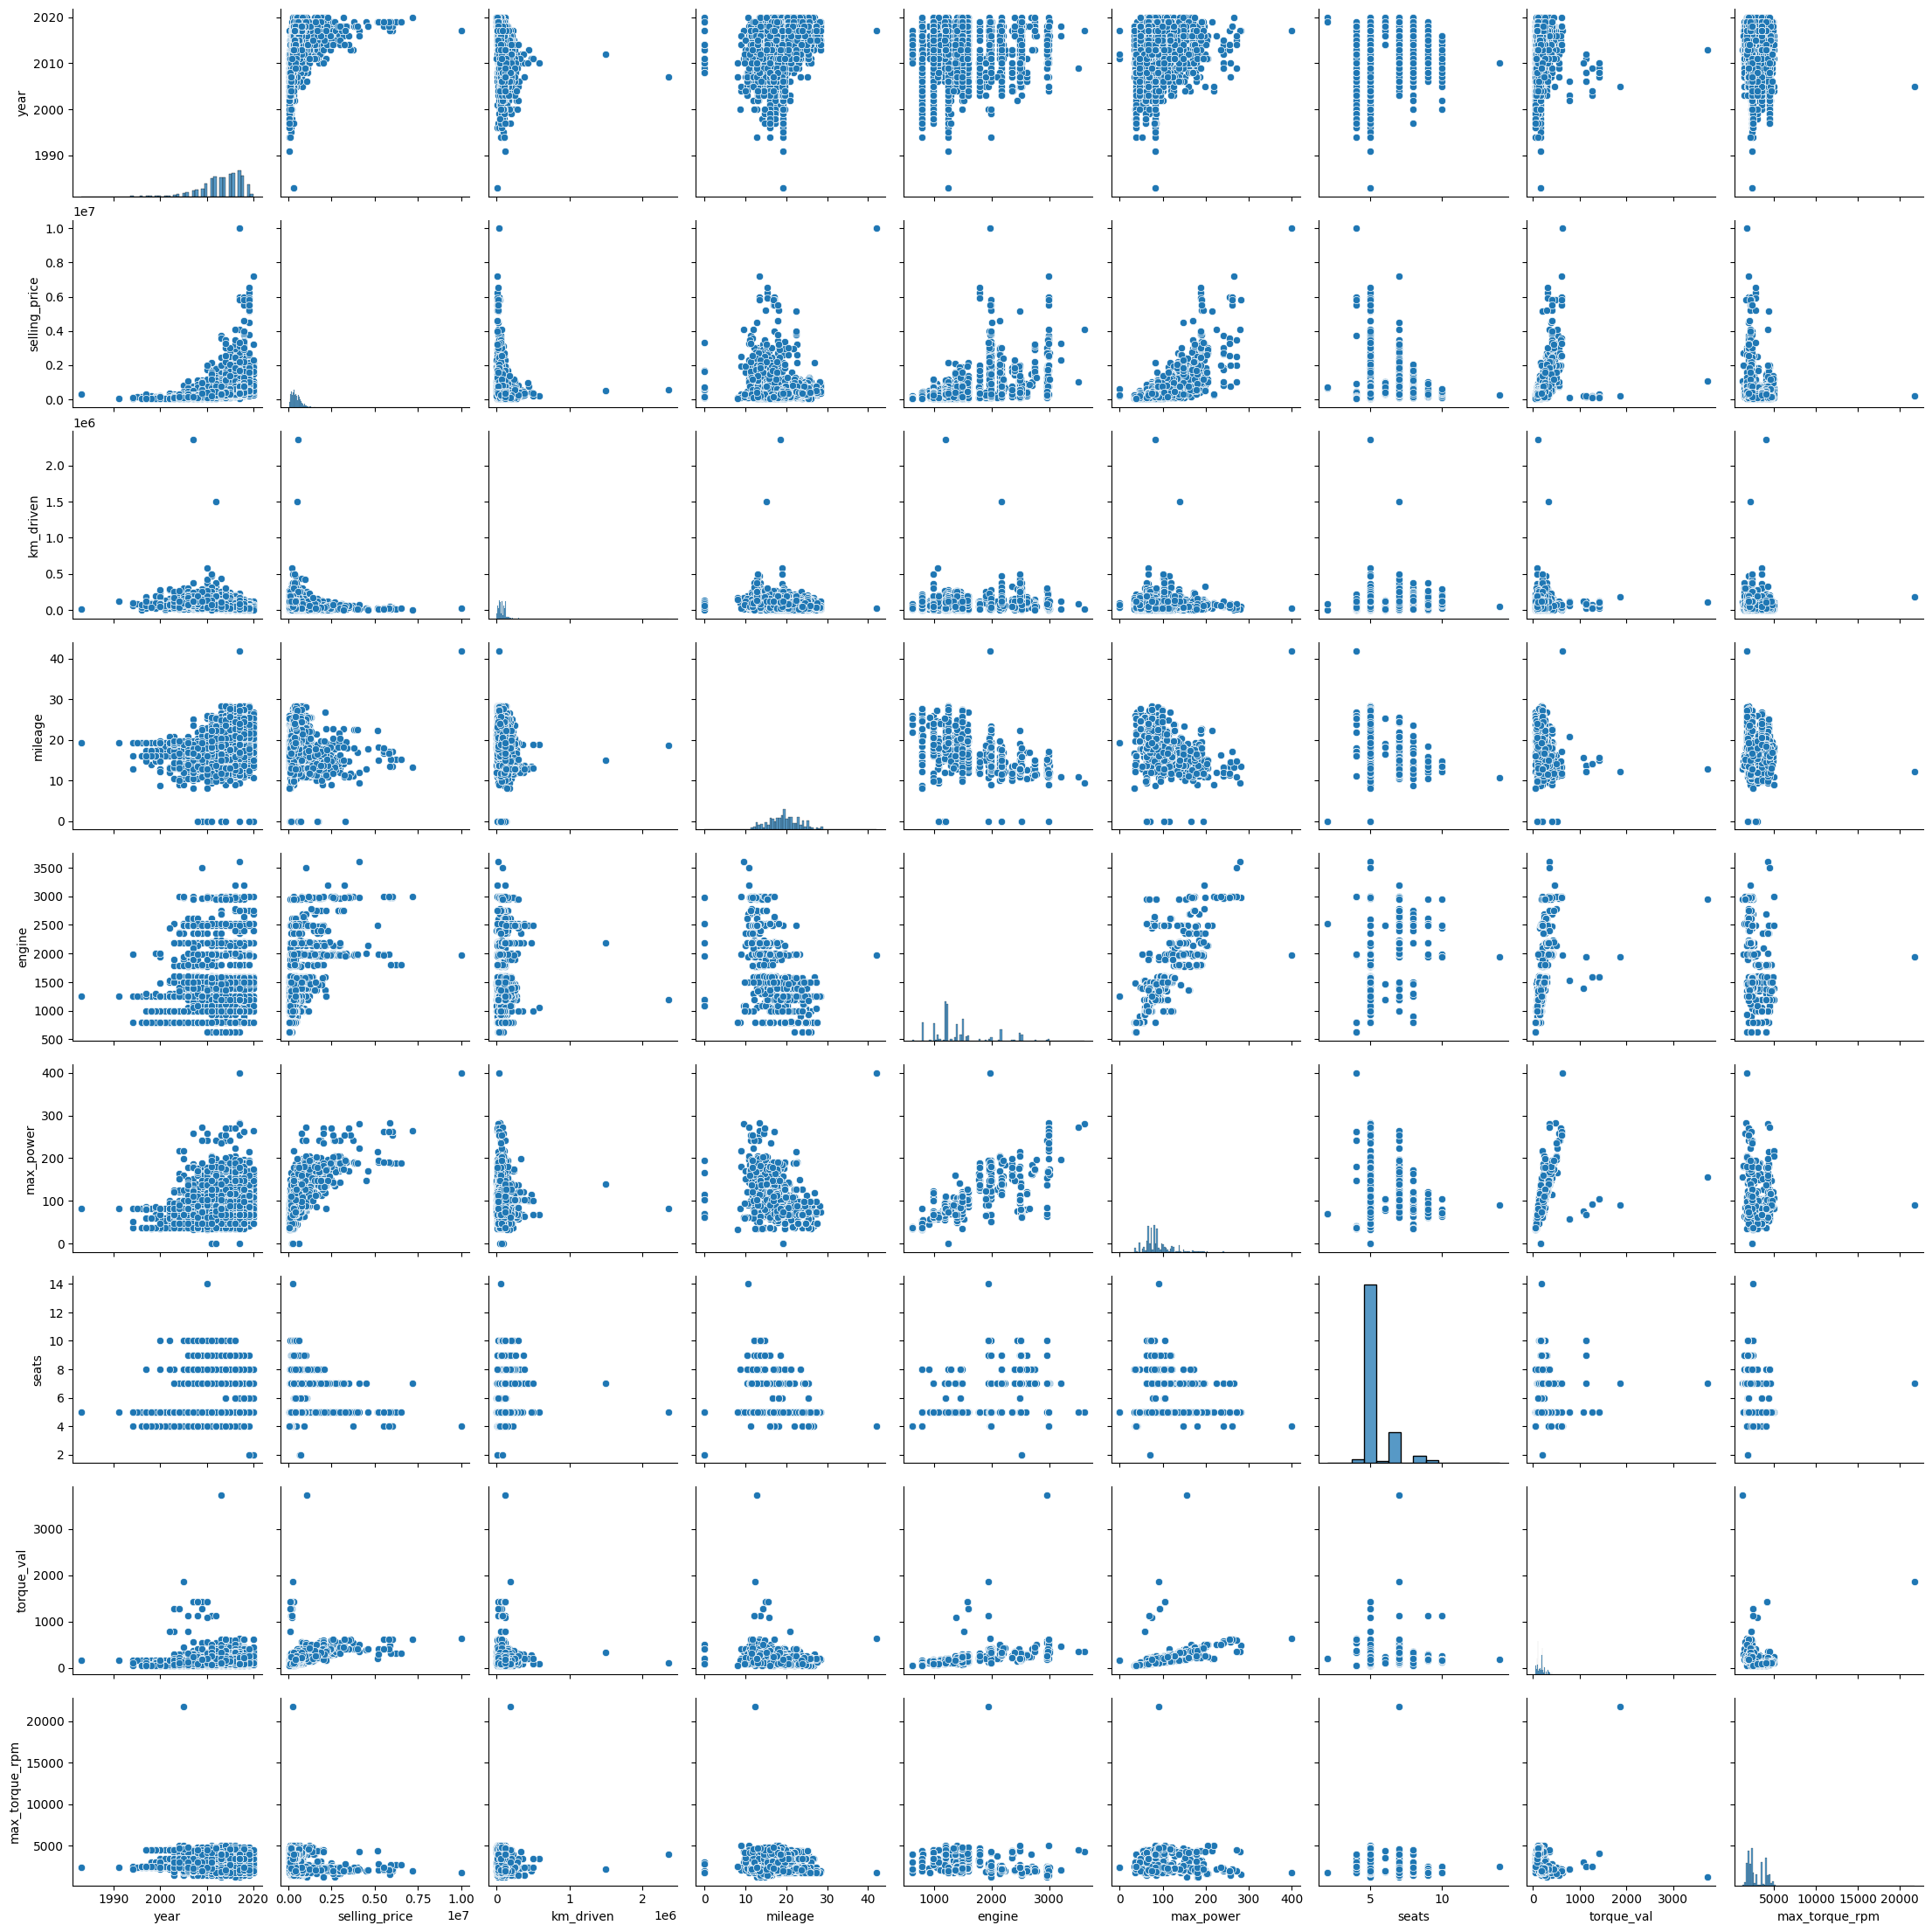

In [306]:
sns.pairplot(df_train)

На основе распределений можно сделать следующие выводы по поводу связи **selling_price**, с остальными признаками
1. Корреляция year с целевой переменной сильная, четко видно что в целом более новые машины имеют более высокую стоимость
2. Корреляция между **km_driven** и целевой переменной так же заметна, но в данном случае она обратная - чем выше пробег, тем меньше стоимость.
3. Между **mileage** и **selling_price** четкой зависимости не видно, облако широкое без какого-либо наклона
4. Более высокие значения признака **engine** в целом означают более высокую стоимость
5. **max_power** имеет четкий тренд, а значит зависимость сильная, но так же широкое облако указывает на сильный разброс значений.
6. Зависимость **selling_price** от **seats** не линейная, для каждого seats есть множество разных вариантов стоимости, так же, на основе данных из датасета можно предположить, что до определенного значения seats стоимость растет, но после него падает.
7. Между признаками **torque_val** и **max_torque_rpm** и целевой переменной по графику не видно явной зависимости

Так же можно выдвинуть гипотезы о сильной прямой корреляции между **engine** и **max_power**, и обратной корреляции между **mileage** и **max_power**. Между остальными признаками не заметно четкой линейной связи.
Так же можно выделить монотонную зависимость между **engine** и **max_power**, **km_driven** и **year**, **mileage** и **engine**, **seats** и **engine**, **seats** и **max_power**

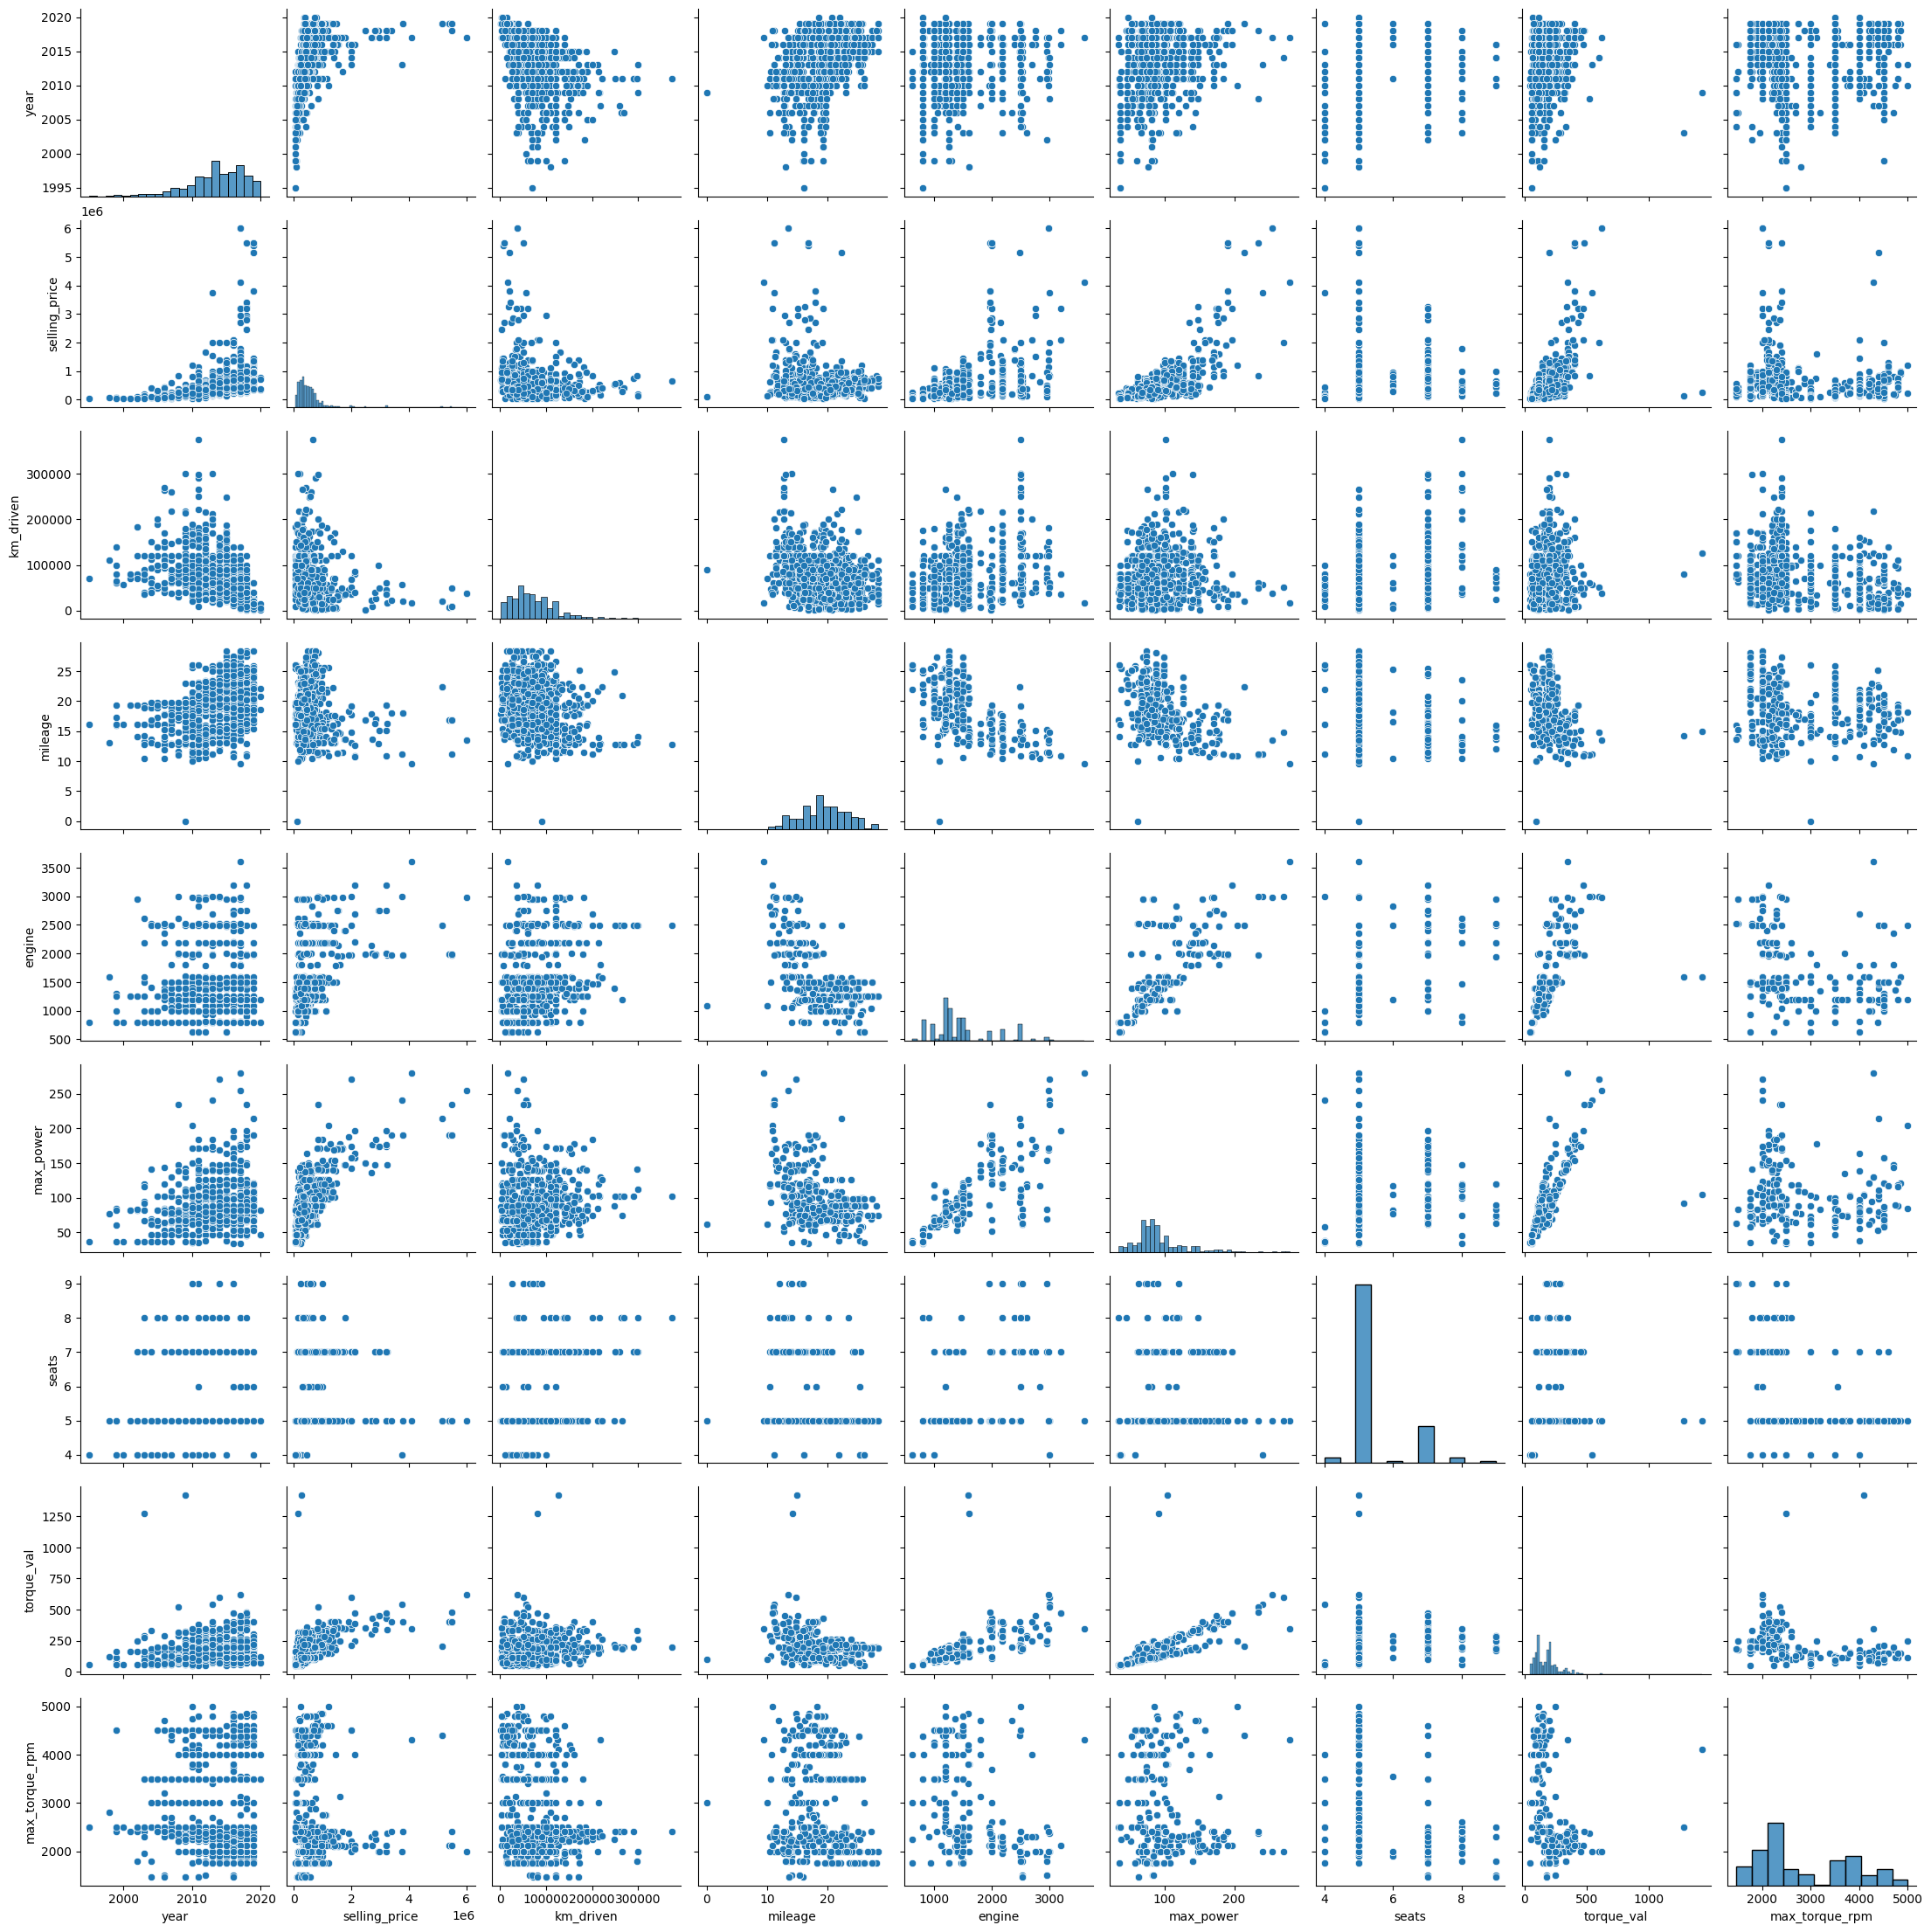

In [307]:
# строим pairplot для тестовой выборки
sns.pairplot(df_test)

В целом характер зависимостей для тестовой выборки очень похож на тот, что был выявлен для тренировочной выборки. Тут так же есть взаимосвязь между engine и max_power, selling_price и year, selling_price и km_driven, а так же mileage и max_power

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

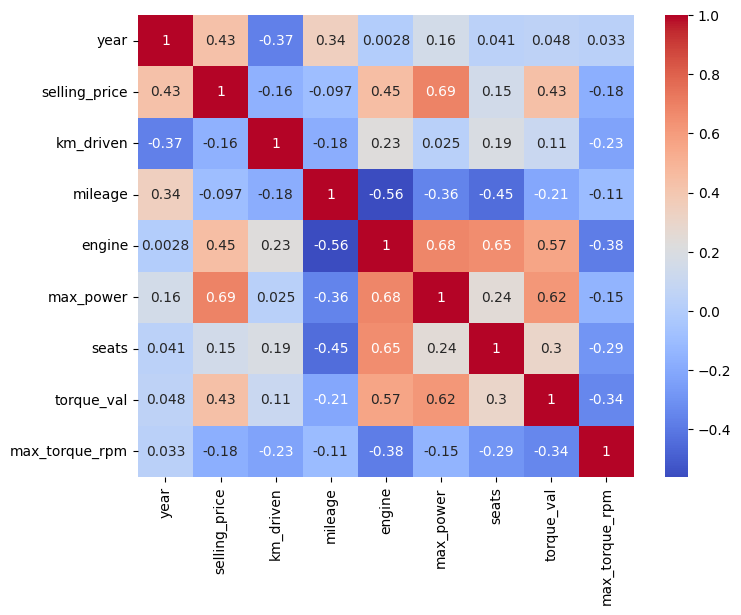

In [308]:
# your code here
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

1. Наименее скоррелированы между собой признаки **engine** и **year**
2. Довольно сильная положительная зависимость наблюдается между **selling price** и **max_power**
3. Верно, так как между ними корреляция отрицательная, то есть обратная
4. Функция pd.corr() по умолчанию использует корреляцию pearson, которая показывает линейную зависимость. Так же в рамках этой функции можно использовать kendall (ранговая завивимость) и spearman (ранговая корреляция)

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


Реализация корреляции Спирмена

Коэффициент ранговой корреляции Спирмена вычисляется по формуле:

$$
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

где:

$
n \text{ — число наблюдений}
$

$
d_i = R(x_i) - R(y_i) \text{ — разность рангов двух переменных для } i\text{-го объекта}
$


In [309]:
# напишем функцию для вычисления разности рангов
def my_spearman(dataset):

  # присвоим всем значениям ранги, используя библиотеку numpy
  num_df = dataset.select_dtypes(include='number')
  data_np = num_df.to_numpy()
  ranks = np.argsort(np.argsort(data_np, axis=0), axis=0)

  # считаем число наблюдений
  n = dataset.shape[0]

  # создаем пустую матрицу для заполнения полученными коэффициентами
  spearman_matrix = np.zeros((ranks.shape[1], ranks.shape[1]))

  # проходимся по всем парам признаков функцией for
  for i in range(ranks.shape[1]):
    for j in range(ranks.shape[1]):
      d = ranks[:, i] - ranks[:, j]  # вычисляем разность рангов
      p = 1 - (6 * np.sum(d ** 2)) / (n * (n**2 - 1))  # подставляем данные в формулу
      spearman_matrix[i, j] = p # записываем полученное значение в матрицу

  return spearman_matrix



Применяем функцию и смотрим что получилось

<Axes: >

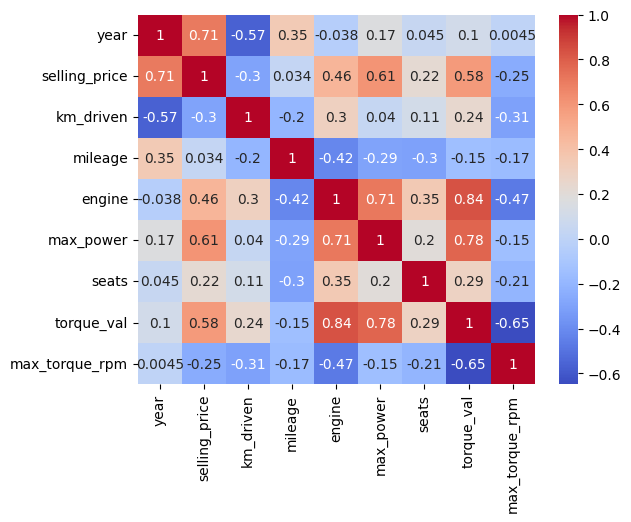

In [310]:
sns.heatmap(pd.DataFrame(my_spearman(df_train), columns=df_train.select_dtypes(include='number').columns, index=df_train.select_dtypes(include='number').columns), annot = True, cmap = 'coolwarm')

Посмотрим на результата с использованием библиотечной функции

<Axes: >

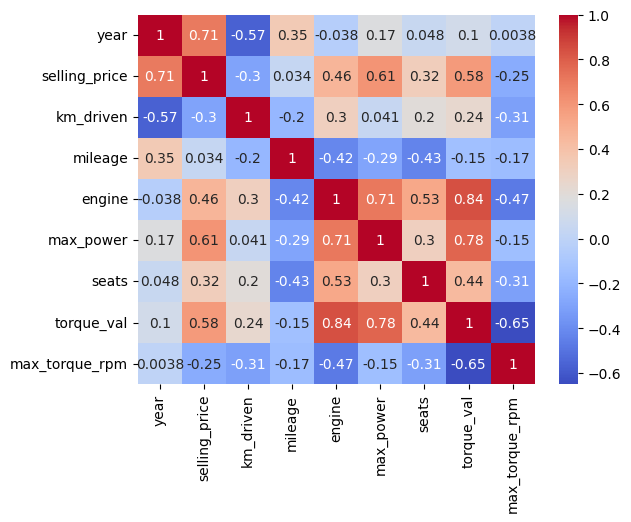

In [311]:
sns.heatmap(df_train.select_dtypes(include='number').corr(method ='spearman'), annot=True, cmap='coolwarm')

Получившиеся ручным и библиотечным способом коэффициенты корреляции очень близки, но есть и некоторые различия. Возможно это связано с отличиями в определении рангов или округлении.

Некоторые значения матриц коэффициентов **spearman**, построенных обоими способами, отличаются от тех, что были получены с помощью корреляции Пирсона.
С первого взгляда, после изучения особенностей этих двух корреляций, могу предположить, что корреляции Спирмена можно верить больше, так как она учитывает выбросы и монотонные зависимости, которые присутствуют в этом датасете, как было выделено выше (например **engine** и **max_power**, **km_driven** и **year**, **mileage** и **engine**, **seats** и **engine**, **seats** и **max_power**), но так же хорошо справляется и с явными линейными зависимостями.



Матрица корреляций Phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_val', 'max_torque_rpm']


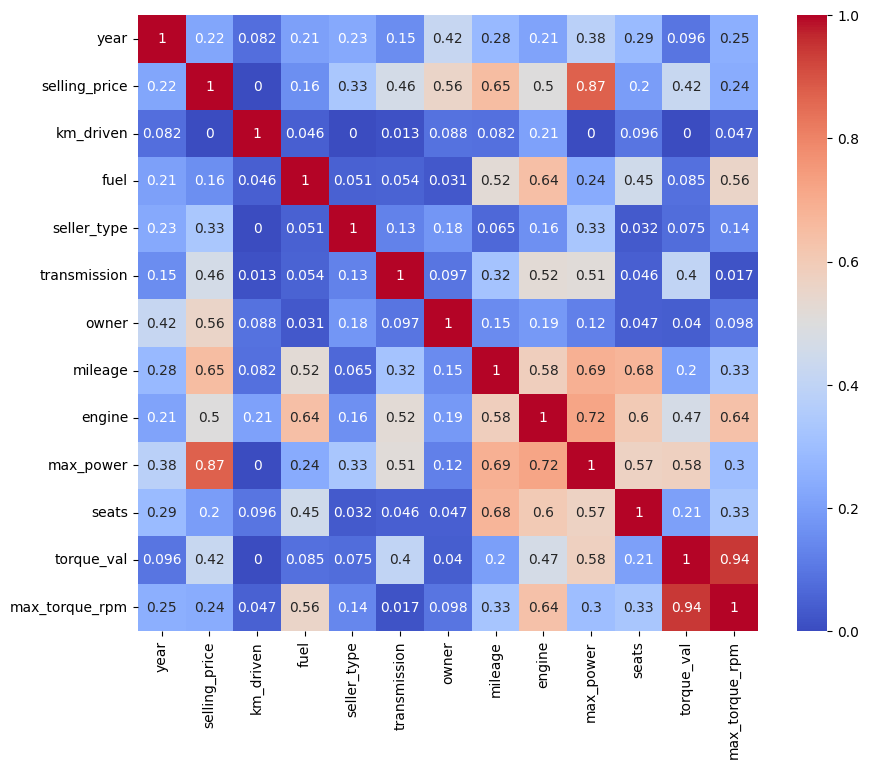

In [312]:
# предварительно исключим столбец name, так как там слишко много уникальных значений, которые могут негативно повлиять на результаты
phik_df = df_train.drop(columns=['name'])
phik_corr = phik_df.phik_matrix()
# построим матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.show()

Матрица Phik показывает зависимость и между категориальными, и между числовыми признаками.
Из heatmap можно сделать дополнительные выводы, такие как:
1. Между признаками **fuel** и **max_torque_rpm**, **seats**, **engine** и **mileage** наблюдается относительно высокая зависимость, когда у того же признака **fuel** корреляция с целевой переменной ниже
2. У признака **seller_type** полностью отсутствует корреляция с **km_driven**, и в целом хоть какая-то более менее значимая зависимость наблюдается только с переменными **max_power** и **selling_price**.
3. **Transmission** значительно коррелирует с такими признаками, как **max_power**, **engine**, **selling_price**
4. Рассматривая коэффициенты корреляции признака **owner** можно выделить относительно высокую зависимость от признаков **year** и **selling_price**

Однако, в то же время, зависимость между числовыми признаками значительно ниже, чем при использовании корреляции Пирсона или Спирмена, хотя ранее было отмечено, что, например, между признаками **year** и **selling_price** зависимость значительная, а между **torque_val** и **max_torque_rpm** все предыдущие матрицы корреляции показывали обратную зависимость, тогда как phik показывает очень сильную прямую зависимость. С технической точки зрения этого просто не может быть, так как моторы с высоким **max_torque_rpm** на практике имеют низкий **torque_val**.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

В рамках этого задания, я бы хотела попробовать использовать две разные корреляции в зависимости от признаков. Так как корреляция Спирмана хорошо себе показывает на числовых данных, а phik отличный вариант для применения на категориальных признаках, попробуем совместить их

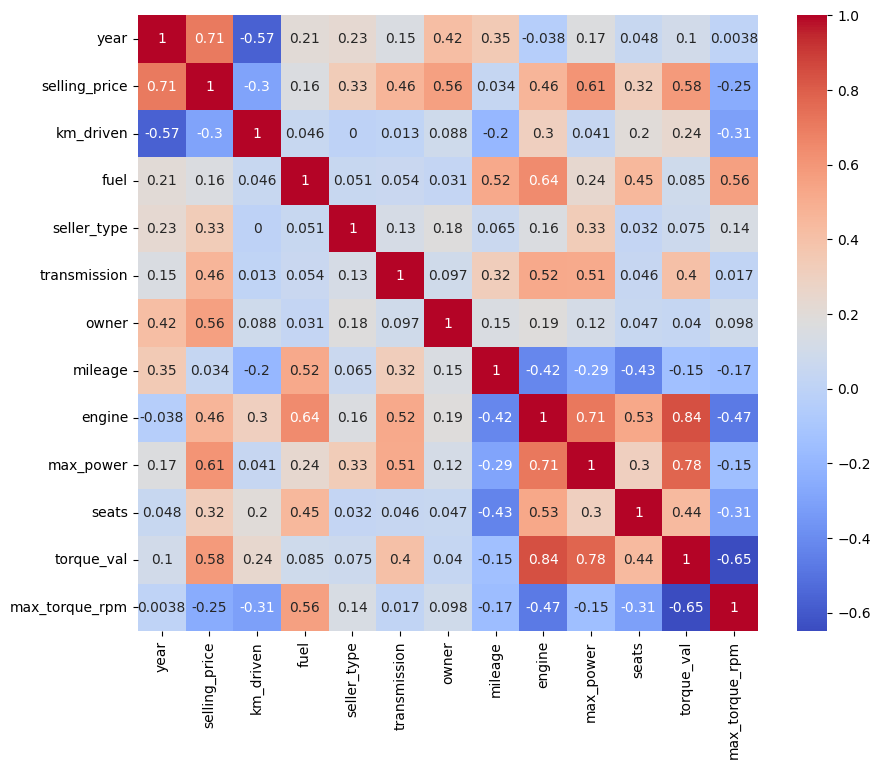

In [313]:
# сразу используем phik_df, так как там уже исключен столбец name
colms = phik_df.columns

# создаем пустую матрицу для заполнения
test_corr = np.zeros((len(colms), len(colms)))

# пробегаемся по всем i и j
for i in range(len(colms)):
    for j in range(len(colms)):
      col_i = colms[i]
      col_j = colms[j]
      # применяем корреляцию Спирмана, если оба значения числовые
      if col_i in df_train.select_dtypes(include='number').columns  and col_j in df_train.select_dtypes(include='number').columns:
        test_corr[i, j] = phik_df[[col_i, col_j]].corr(method='spearman').iloc[0, 1]
      # применяем корреляцию phik, если хотя бы одно значение категориальное
      else:
        test_corr[i, j] = phik_corr.loc[col_i, col_j]

# создаем из полученного массива датафрейм
corr_df = pd.DataFrame(test_corr, index=colms, columns=colms)

# выводим heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(corr_df), annot=True, cmap='coolwarm')
plt.show()

Теперь у нас сохраняются корректные значения коэффициентов корреляции для числовых признаков, но так же учитываются и взаимосвязи с категориальными

Еще хочется нарисовать boxplot, чтобы отдельно посмотреть зависимости между **selling_price**  и отдельными значениями категориальных признаков. Из этой информации мы можем глубже проанализировать зависимость цены не только от самого признака, но и от каждого возможного значения этого признака отдельно

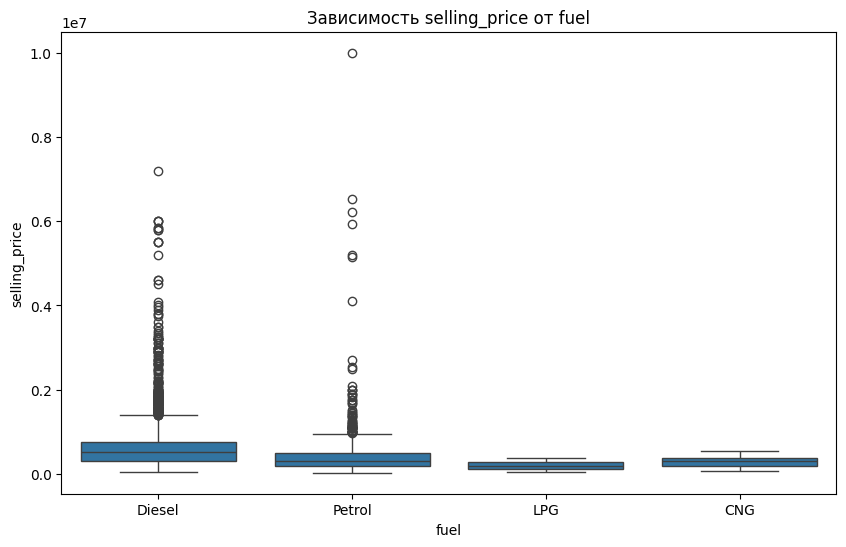

In [314]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от fuel')
plt.show()


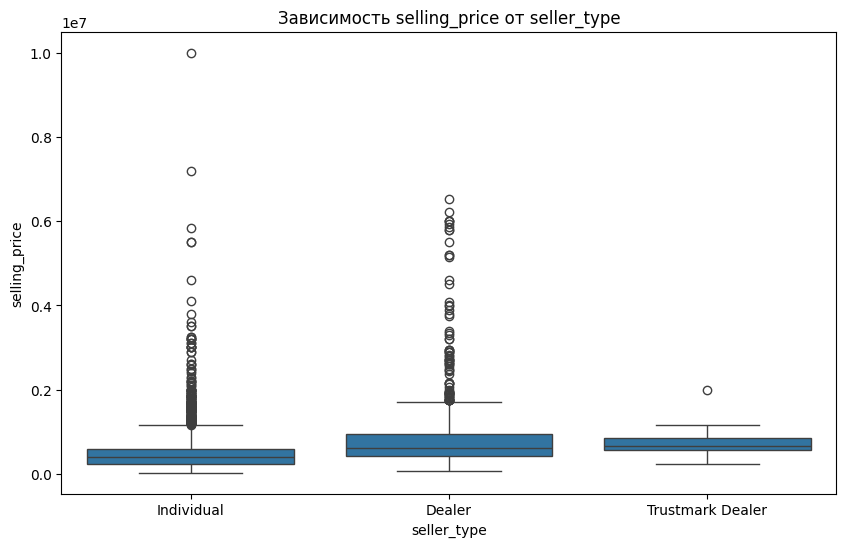

In [315]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от seller_type')
plt.show()

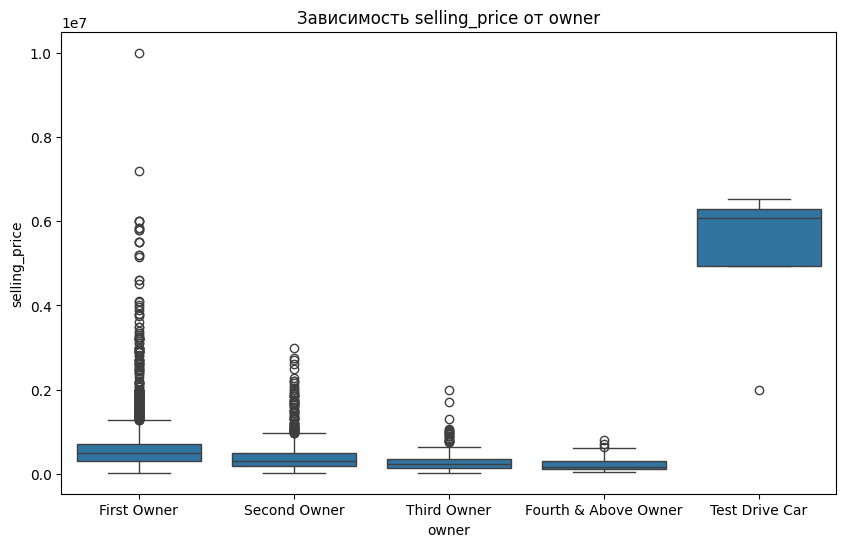

In [316]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от owner')
plt.show()

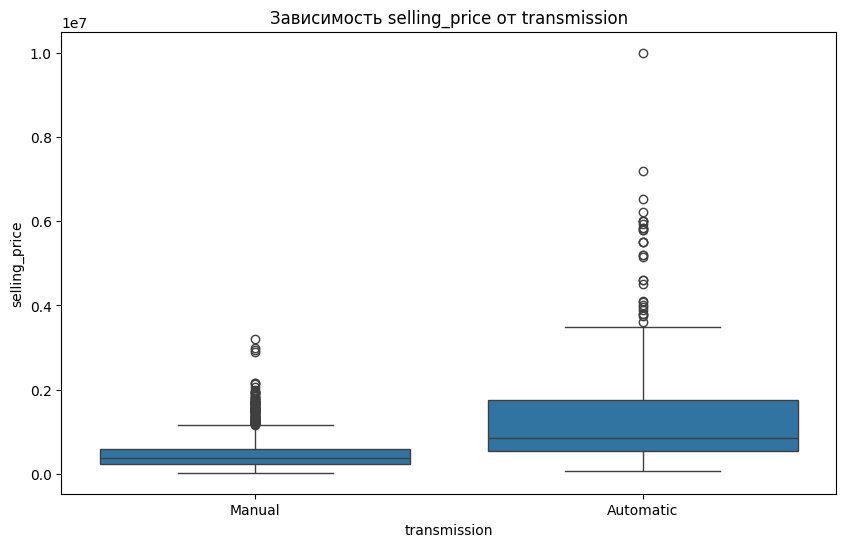

In [317]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от transmission')
plt.show()

Из графиков выше можно сделать следующие выводы:
1. На дизеле автомобили в целом дороже, но их в датасете и больше. Так же можно обратить внимание на большее количество выбросов среди дизельных авто.
2. Стоимость машин в зависимости от **seller_type** особо не меняется, но у **Dealer** заметно больше разброс
3. Автомобили со значением **owner** **first_owner** значительно дороже. В целом этот график подтверждает логичную гипотезу о том, что меньшее количество владельцев означает более высокую стоимость.
4. Автомобилей с transmission **Automatic** сильно меньше, но они дороже.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [318]:
# создаем копию df с вещественными признаками
obj_df_train = df_train.select_dtypes(include='number')
obj_df_test = df_test.select_dtypes(include='number')
y_train = obj_df_train['selling_price']
X_train = obj_df_train.drop(columns=['selling_price'])

In [319]:
# опишите выбранные вещественные признаки
print(f'Для обучения модели выбраны признаки {', '.join(X_train.columns)}')

Для обучения модели выбраны признаки year, km_driven, mileage, engine, max_power, seats, torque_val, max_torque_rpm


Признак **year** отображает год выпуска машины. Чем новее машина, тем выше ее стоимость

**km_driven** - пробег. чем выше пробег, тем ниже стоимость

**mileage** - расход топлива на километр, показывает насколько машина экономична. может быть связана с **engine** и max_power

**engine** - объем двигателя, машины с большим **engine** обычно выше в стоимости

**max_power** - максимальная мощность двигателя, обычно напрямую влияет на стоимость автомобиля

**torque_val** - крутящий момент, то есть сила, с которой двигатель вращает колеса

**max_torque_rpm** - обороты в минуту, при которых достигается максимальный крутящий момент

In [320]:
y_test = obj_df_test['selling_price']
X_test = obj_df_test.drop(columns=['selling_price'])

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [321]:
# объявляем модель
model_LR = LinearRegression()

# обучение и предикт
model_LR.fit(X_train, y_train)
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

# вывод результатов
print(f'R2 на трейне: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тесте: {r2_score(y_test, y_test_pred)}')
print(f'MSE на трейне: {MSE(y_train, y_train_pred)}')
print(f'MSE на тесте: {MSE(y_test, y_test_pred)}')

R2 на трейне: 0.601684889360586
R2 на тесте: 0.5996951886357915
MSE на трейне: 114172381456.5194
MSE на тесте: 230106636531.60794


R2 метрика приблизительно одинакова и для трейна и для теста. Такое близкое значение может говорить об оптимальном обучении модели (нет переобучения) Не идеально, но и не такой плохой результат.
MSE не информативна, так как интерпретировтать результат из нее фактически невозможно.

In [322]:
# хочу для наглядности посмотреть MAE
from sklearn.metrics import mean_absolute_error as MAE

print(f'MAE на трейне: {MAE(y_train, y_train_pred)}')
print(f'MAE на тесте: {MAE(y_test, y_test_pred)}')

MAE на трейне: 180815.11793521876
MAE на тесте: 220888.03366268298


Тут уже гораздо более информативно. Ошибка в среднем 200,000.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

Формула $R^2:$

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Подробно каждую компоненту можно объяснить так:

$ y_i $ — фактическое значение целевой переменной, то, что было известно изначально из датасета

$\bar{y}$ — среднее значение фактической переменной - сумма всех фактических значений, деленая на их количество

$\hat{y}_i$ — предсказанное значение, то, что модель вычислила после обучения

$n$ — количество наблюдений (объектов) в выборке

В числителе находится сумма квадратов ошибок, которая показывает насколько сильно предсказания отклоняются от реальных значений

В знаменателе сумма квадратов отклонений от среднего, или общая дисперсия

Данную метрику можно интерпретировать следующим образом:

$ R^2 < 0 $ - предсказание модели хуже среднего фактического значения целевой переменной

$ R^2 = 0 $ - предсказание модели равно среднему фактическому значению целевой переменной

$ R^2 > 0 $ - предсказание модели идеально

In [323]:
# воспроизведем формулу метрики вручную

def my_r_square (y_train, y_pred):
  # считаем сумму квадратов ошибок
  ss_res = np.sum((y_train - y_pred) ** 2)

  # считаем сумму квадратов отклонений от среднего
  ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)

  # подставляем значения в формулу
  r_square = 1 - (ss_res/ss_tot)

  return r_square


In [324]:
# посмотрим на результат
print(f'Моя R2 на трейне: {my_r_square(y_train, y_train_pred)}')
print(f'Моя R2 на тесте: {my_r_square(y_test, y_test_pred)}')

Моя R2 на трейне: 0.601684889360586
Моя R2 на тесте: 0.5996951886357915


Значения получились идентичные библиотечной функции!

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

### Формула скорректированного коэффициента детерминации (Adjusted \( R^2 \)):
$$
R^2_{\text{adj}} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$

**Где:**

$R^2$ — коэффициент детерминации (обычный),

$ n$ — количество наблюдений,

$p$ — количество признаков в модели.


In [325]:
# your code here
def my_r_square_adj(y_train, y_pred, X_train):
  # реализация r2 из предыдущего задания
  ss_res = np.sum((y_train - y_pred) ** 2)
  ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)
  r_square = 1 - (ss_res/ss_tot)

  # вычисляем n
  n = X_train.shape[0]

  # вычисляем p
  p = X_train.shape[1]

  # подставляем в формулу
  r_square_adj = 1 - ((1 - r_square) * (n - 1) / (n - p -1))
  return r_square_adj

In [326]:
print(f'Моя R2 adj на трейне: {my_r_square_adj(y_train, y_train_pred, X_train)}')
print(f'Моя R2 adj на тесте: {my_r_square_adj(y_test, y_test_pred, X_test)}')

Моя R2 adj на трейне: 0.6011384100456973
Моя R2 adj на тесте: 0.5964636664451621


  adjusted−R2 может использоваться в том случае, когда нам важно учесть не только точномть предсказания, но количество используемых признаков.
  Это может быть полезно, если мы убираем или добавляем какие-либо признаки при обучении моделей, а так же сравниваем результаты моделей с разным количеством признаков между собой. Это поможет понять действительно ли новый признак улучшает качество модели или просто подгоняет ее.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [327]:

# объявляем функцию и стандартизуем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# обучаем модель на стандартизированных признаках
model_LR.fit(X_train_scaled, y_train)

y_train_scaled_pred = model_LR.predict(X_train_scaled)
y_test_scaled_pred = model_LR.predict(X_test_scaled)

# выводим метрики
print(f'R2 на трейне: {r2_score(y_train, y_train_scaled_pred)}')
print(f'R2 на тесте: {r2_score(y_test, y_test_scaled_pred)}')
print(f'MSE на трейне: {MSE(y_train, y_train_scaled_pred)}')
print(f'MSE на тесте: {MSE(y_test, y_test_scaled_pred)}')

R2 на трейне: 0.6016848893605868
R2 на тесте: 0.5996951886357927
MSE на трейне: 114172381456.51913
MSE на тесте: 230106636531.60718


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [328]:
coeffs = pd.Series(model_LR.coef_, index=X_train.columns)
coeffs.abs().sort_values(ascending=False)

,0
max_power,326827.52
year,167048.42
max_torque_rpm,65601.48
km_driven,49734.70
seats,32747.50
engine,14765.85
mileage,13339.17
torque_val,3698.72


**max_power** имеет наибольший по модулю коэффициент, а значит является самым информативным признаком

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [329]:

# объявляем модель и обучаем ее на стандартизированных признаках
model_L = Lasso()
model_L.fit(X_train_scaled, y_train)
y_train_lasso_pred = model_L.predict(X_train_scaled)
y_test_lasso_pred = model_L.predict(X_test_scaled)

# выводим метрики
print(f'R2 на трейне: {r2_score(y_train, y_train_lasso_pred)}')
print(f'R2 на тесте: {r2_score(y_test, y_test_lasso_pred)}')
print(f'MSE на трейне: {MSE(y_train, y_train_lasso_pred)}')
print(f'MSE на тесте: {MSE(y_test, y_test_lasso_pred)}')


R2 на трейне: 0.6016848893154992
R2 на тесте: 0.5996939340336028
MSE на трейне: 114172381469.44296
MSE на тесте: 230107357712.77194


Показатели метрик практически не изменились, посмотрим на коэффициенты

In [330]:
print(model_L.coef_)

[167046.28170703 -49733.74529359 -13335.91359316  14764.21228912
 326828.92305955 -32743.59473571   3698.03339475 -65599.34354117]


Из коэффициентов можно сделать вывод, что L1 по умолчанию не занулила никакие веса. Причиной может быть то, что данные не сильно зашумлены и все признаки действительно имеют вес.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [331]:
alphas = np.logspace(-2, 5, 100)  # от 0.01 до 100000
lasso = Lasso(max_iter=10000) # стандартное количество итераций 1000, но увеличим до 10000 чтобы обучение не прерывалось

grid = GridSearchCV(lasso, param_grid = {'alpha': alphas, 'selection': ['cyclic', 'random']}, cv=10)
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-02, 1.17681195e-02, 1.38488637e-02, 1.62975083e-02,
       1.91791026e-02, 2.25701972e-02, 2.65608778e-02, 3.12571585e-02,
       3.67837977e-02, 4.32876128e-02, 5.09413801e-02, 5.99484250e-02,
       7.05480231e-02, 8.30217568e-02, 9.77009957e-02, 1.14975700e-01,
       1.35304777e-01, 1.59228279e-01, 1....
       2.36448941e+03, 2.78255940e+03, 3.27454916e+03, 3.85352859e+03,
       4.53487851e+03, 5.33669923e+03, 6.28029144e+03, 7.39072203e+03,
       8.69749003e+03, 1.02353102e+04, 1.20450354e+04, 1.41747416e+04,
       1.66810054e+04, 1.96304065e+04, 2.31012970e+04, 2.71858824e+04,
       3.19926714e+04, 3.76493581e+04, 4.43062146e+04, 5.21400829e+04,
       6.13590727e+04, 7.22080902e+04, 8.49753436e+04, 1.00000000e+05]),
                         'selection': ['cyclic', 'random']})

1. Грид - серчу пришлось обучить 100 (количество alpha) * 10 (количество фолдов) * 2 (два типа 'selection') = 2000 моделей
2. В param_grid я использовала 'alphas' - диапазон коэффициентов регулярицазии и количество этих коэффициентов. 'selection' - способ выбора признаков на каждом шаге.

In [332]:
best_lasso = grid.best_estimator_
coeffs = best_lasso.coef_
zero = np.sum(coeffs == 0)
print(f'Количество зануленных коэффициентов: {zero}, коэффициент регуляризации лучшей модели: {best_lasso}')

Количество зануленных коэффициентов: 4, коэффициент регуляризации лучшей модели: Lasso(alpha=np.float64(23101.29700083158), max_iter=10000)


In [333]:
# посмотрим как работает такая модель

best_alpha = grid.best_params_['alpha']
lasso_grid = Lasso(alpha = best_alpha)
lasso_grid.fit(X_train_scaled, y_train)
lasso_grid_train_pred = lasso_grid.predict(X_train_scaled)
lasso_grid_test_pred = lasso_grid.predict(X_test_scaled)

print(f'R2 на трейне: {r2_score(y_train, lasso_grid_train_pred)}')
print(f'R2 на тесте: {r2_score(y_test, lasso_grid_test_pred)}')
print(f'MSE на трейне: {MSE(y_train, lasso_grid_train_pred)}')
print(f'MSE на тесте: {MSE(y_test, lasso_grid_test_pred)}')


R2 на трейне: 0.593298803152317
R2 на тесте: 0.5715737852888855
MSE на трейне: 116576155272.5836
MSE на тесте: 246271622200.036


Метрики получились еще хуже...

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [334]:

alphas = np.logspace(np.log10(15000), np.log10(30000), 50)
l1_ratios = np.linspace(0, 1.0, 5)

elastic = ElasticNet(max_iter=10000)

grid = GridSearchCV(elastic, param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios, 'selection': ['cyclic', 'random'] } , cv=10)
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': array([15000.        , 15213.69580451, 15430.43600214, 15650.26396451,
       15873.22368108, 16099.35976806, 16328.71747725, 16561.34270511,
       16797.28200198, 17036.58258138, 17279.29232944, 17525.45981448,
       17775.13429678, 18028.36573837, 18285.20481307, 18545.70291661,
       18809.91217694, 19077.88546464, 19349...
       22289.91433705, 22607.46508217, 22929.53977808, 23256.20287474,
       23587.51974028, 23923.5566741 , 24264.38092012, 24610.06068023,
       24960.66512797, 25316.26442234, 25676.92972187, 26042.73319882,
       26413.74805366, 26790.04852969, 27171.70992792, 27558.80862211,
       27951.4220741 , 28349.62884926, 28753.50863222, 29163.14224287,
       29578.61165244, 30000.        ]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'selection': ['cyclic', 'random']})

1. Грид - серчу пришлось обучить 50 (количество alpha) * 10 (количество фолдов) * 2 (два типа 'selection') * 5 (количество l1-ratios) = 5000 моделей

In [335]:
best_alpha = grid.best_params_['alpha']
best_l1_ratio = grid.best_params_['l1_ratio']
best_selection = grid.best_params_['selection']
print(f'Лучшие гиперпараметры: alpha = {best_alpha}, l1_ratio = {best_l1_ratio}, selection = {best_selection}')

Лучшие гиперпараметры: alpha = 22929.539778079397, l1_ratio = 1.0, selection = random


In [336]:
# посмотрим как работает такая модель, объявляем ее с подобранными параметрами
elastic_mod = ElasticNet(alpha = best_alpha, l1_ratio = best_l1_ratio, selection = best_selection)

# обучаем
elastic_mod.fit(X_train_scaled, y_train)
elastic_mod_train_pred = elastic_mod.predict(X_train_scaled)
elastic_mod_test_pred = elastic_mod.predict(X_test_scaled)

# смотрим результат
print(f'R2 на трейне: {r2_score(y_train, elastic_mod_train_pred)}')
print(f'R2 на тесте: {r2_score(y_test, elastic_mod_test_pred)}')
print(f'MSE на трейне: {MSE(y_train, elastic_mod_train_pred)}')
print(f'MSE на тесте: {MSE(y_test, elastic_mod_test_pred)}')


R2 на трейне: 0.5934004375903901
R2 на тесте: 0.5717697501682384
MSE на трейне: 116547022946.13437
MSE на тесте: 246158975991.48175


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



Формула L0:


$$
\min_{w} \; \|y - Xw\|_2^2 + \lambda \|w\|_0
$$

где  
$\|y - Xw\|_2^2$ — квадратичная ошибка модели,  
$\|w\|_0$ — L₀-норма (количество ненулевых коэффициентов),  
$\lambda$ — коэффициент регуляризации.


In [337]:

def l0_regression(X, y, l):

  #стандартизируем
  X_scaled =  pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

  # начнем с перебора всех комбинаций признаков
  features = X.columns # определяем количество признаков
  feature_comb = []
  for r in range(1, len(features) + 1):
      feature_comb.extend(combinations(features, r))

  # объявляем переменные
  min_loss = float("inf")
  best_features = None
  best_model = None

  # пробегаемся циклом по всем комбинациям и обучаем на них модель
  for i in range(len(feature_comb)):
    model = LinearRegression()
    features_ = list(feature_comb[i])

    X_train_l0 = X_scaled[features_] # берем только признаки из комбинации
    model.fit(X_train_l0, y)
    y_train_l0_pred = model.predict(X_train_l0)

    # считаем компоненты формулы и подставляем
    mse_l0 = MSE(y, y_train_l0_pred)
    r2_l0 = r2_score(y, y_train_l0_pred)
    lw = l * len(features_)
    loss = mse_l0 + lw

    # определяем лучший результат

    if loss < min_loss:
      min_loss = loss
      best_features = features_
      best_mse = mse_l0
      best_r2 = r2_l0

  result = f'Наиболее весомые признаки: {best_features}\nМинимальный Loss: {min_loss}\nЛучший MSE: {best_mse}\nЛучший R2: {best_r2}'
  print(result)

In [338]:

# посмотрим как функция поведет себя на трейн выборке (надеюсь сама функция получилась правильная :))
lambda_list = [1e6,1e7, 9e7, 2e8, 5e8, 2.3e9, 3e9, 3e10] # значения были подобраны вручную так, чтобы посмотреть на результаты всех вариантов количества признаков от 8 до 1

for i in lambda_list:
  print(f'При lambda = {i}:\n')
  l0_regression(X_train, y_train, i)
  print ('\n')


При lambda = 1000000.0:

Наиболее весомые признаки: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_val', 'max_torque_rpm']
Минимальный Loss: 114180381456.51913
Лучший MSE: 114172381456.51913
Лучший R2: 0.6016848893605868


При lambda = 10000000.0:

Наиболее весомые признаки: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm']
Минимальный Loss: 114249761650.95935
Лучший MSE: 114179761650.95935
Лучший R2: 0.6016591419519097


При lambda = 90000000.0:

Наиболее весомые признаки: ['year', 'km_driven', 'mileage', 'max_power', 'seats', 'max_torque_rpm']
Минимальный Loss: 114770267723.44046
Лучший MSE: 114230267723.44046
Лучший R2: 0.6014829405659736


При lambda = 200000000.0:

Наиболее весомые признаки: ['year', 'km_driven', 'max_power', 'seats', 'max_torque_rpm']
Минимальный Loss: 115373238091.41832
Лучший MSE: 114373238091.41832
Лучший R2: 0.6009841574346


При lambda = 500000000.0:

Наиболее весомые признаки: ['year', 'km_driven', 

Эксперименты показали, что чем больше значение lambda, тем хуже показатели MSE и R2. Так как при более малых значениях lambda модель показывает лучшие результаты, можно предположить, что все вещественные признаки важны.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [339]:
# посмотрим еще раз как выглядит столбец name и количество уникальных значений в нем

df_train['name']

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Hyundai i20 Sportz Diesel
3,Maruti Swift VXI BSIII
4,Hyundai Xcent 1.2 VTVT E Plus
...,...
5835,Hyundai Santro Xing GLS
5836,Maruti Wagon R VXI BS IV with ABS
5837,Hyundai i20 Magna
5838,Hyundai Verna CRDi SX


Похоже, что марка машины это всегда первое слово в названии, а модель второе, все что далее вероятно конфигурация. Выделим их в отдельные столбцы. Так же можно обратить внимание на то, что тип топлива иногда дублируется в названии, удалим типы топлива из названий.

In [340]:
def name_extract(column):
    try:
        # разделяем на слова
        match = re.findall(r'\b\w+\b', column)
        if not match:
            return None

        brand = match[0]
        model = match[1]
        conf = ' '.join(match[2:])

        return brand, model, conf
    except:
        return None


In [341]:
# удалим типы топлива из названий столбцов перед применением функции
df_train['new_name'] = df_train['name'].str.replace(r'\b(Diesel|Petrol|LPG|CNG)\b', '', regex=True)

# применим функцию
df_train[['brand', 'model', 'conf']] = df_train['new_name'].apply(name_extract).apply(pd.Series)

# посмотрим
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_val,max_torque_rpm,new_name,brand,model,conf
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.00,2000.00,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.00,2000.00,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1 5 TDI Ambition
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.67,2250.00,Hyundai i20 Sportz,Hyundai,i20,Sportz
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,112.78,4500.00,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,113.75,4000.00,Hyundai Xcent 1.2 VTVT E Plus,Hyundai,Xcent,1 2 VTVT E Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,96.10,3000.00,Hyundai Santro Xing GLS,Hyundai,Santro,Xing GLS
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,90.00,3500.00,Maruti Wagon R VXI BS IV with ABS,Maruti,Wagon,R VXI BS IV with ABS
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,113.70,4000.00,Hyundai i20 Magna,Hyundai,i20,Magna
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,235.36,2325.00,Hyundai Verna CRDi SX,Hyundai,Verna,CRDi SX


In [342]:
# применяем к test и удаляем лишние столбцы

df_test['new_name'] = df_test['name'].str.replace(r'\b(Diesel|Petrol|LPG|CNG)\b', '', regex=True)
df_test[['brand', 'model', 'conf']] = df_test['new_name'].apply(name_extract).apply(pd.Series)

df_train = df_train.drop(columns=['name', 'new_name'])
df_test = df_test.drop(columns=['name', 'new_name'])


In [343]:
# посмотрим результат

df_train

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_val,max_torque_rpm,brand,model,conf
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.00,2000.00,Maruti,Swift,Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.00,2000.00,Skoda,Rapid,1 5 TDI Ambition
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.67,2250.00,Hyundai,i20,Sportz
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,112.78,4500.00,Maruti,Swift,VXI BSIII
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,113.75,4000.00,Hyundai,Xcent,1 2 VTVT E Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,96.10,3000.00,Hyundai,Santro,Xing GLS
5836,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,90.00,3500.00,Maruti,Wagon,R VXI BS IV with ABS
5837,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,113.70,4000.00,Hyundai,i20,Magna
5838,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,235.36,2325.00,Hyundai,Verna,CRDi SX


In [344]:
df_test

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_val,max_torque_rpm,brand,model,conf
0,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7,260.00,2000.00,Mahindra,Xylo,E4 BS IV
1,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5,260.00,2125.00,Tata,Nexon,1 5 Revotorq XE
2,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5,172.00,4300.00,Honda,Civic,1 8 S AT
3,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5,200.00,1750.00,Honda,City,i DTEC VX
4,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5,96.00,3000.00,Tata,Indica,Vista Aura 1 2 Safire BSIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5,99.04,4500.00,Hyundai,i10,Magna 1 1L
996,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5,114.70,4000.00,Hyundai,i20,2015 2017 Sportz 1 2
997,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,219.67,2250.00,Hyundai,i20,Era
998,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5,111.80,4000.00,Hyundai,i10,Asta


In [345]:
# выделим категориальные признаки отдельно
X_train_cat = df_train.select_dtypes(include=['object'])
# посмотрим
X_train_cat

,fuel,seller_type,transmission,owner,brand,model,conf
0,Diesel,Individual,Manual,First Owner,Maruti,Swift,Dzire VDI
1,Diesel,Individual,Manual,Second Owner,Skoda,Rapid,1 5 TDI Ambition
2,Diesel,Individual,Manual,First Owner,Hyundai,i20,Sportz
3,Petrol,Individual,Manual,First Owner,Maruti,Swift,VXI BSIII
4,Petrol,Individual,Manual,First Owner,Hyundai,Xcent,1 2 VTVT E Plus
...,...,...,...,...,...,...,...
5835,Petrol,Individual,Manual,First Owner,Hyundai,Santro,Xing GLS
5836,Petrol,Individual,Manual,Second Owner,Maruti,Wagon,R VXI BS IV with ABS
5837,Petrol,Individual,Manual,First Owner,Hyundai,i20,Magna
5838,Diesel,Individual,Manual,Fourth & Above Owner,Hyundai,Verna,CRDi SX


In [346]:
assert X_train_cat.shape == (5840, 11)

AssertionError: 

Изначально категориальных столбиков было 9, но мы превратили 4 из них в вещественные

Столбец name я разделила на 3, получается общая сумма признаков 7

In [347]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brand,model,conf
count,5840,5840,5840,5840,5840,5840,5840
unique,4,3,2,5,30,194,1704
top,Diesel,Individual,Manual,First Owner,Maruti,Swift,Dzire VDI
freq,3177,5223,5336,3603,1804,558,91


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [348]:
# добавим к X_train_cat признак seats
X_train_cat['seats'] = X_train['seats']

'''
Chat GPT подсказал использовать column transformer из библиотеки sklearn.compose чтобы закодировать все признаки разом
используемые параметры:
1.drop удаляет один столбец для каждого признака чтобы избежать мультиколлинеарности
2. sparse_output=False помогает сохранить результат в виде матрицы np
3. handle_unknown='ignore' помогает игнорировать при трансформе тестовой выборки категории, которых не было в тренировочной
'''
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot',
        OneHotEncoder(
            drop = 'first',
            sparse_output=False,
            handle_unknown='ignore'),
         X_train_cat.columns.tolist()
         )
        ],
    remainder='passthrough')

X_train_cat_new = column_transformer.fit_transform(X_train_cat)


In [349]:
# и на тестовой

X_test_cat = df_test.select_dtypes(include=['object'])
X_test_cat['seats'] = X_test['seats']
X_test_cat_new = column_transformer.transform(X_test_cat)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Преобразование применяется только на категориальных признаках. При использовании OHE важно учесь чтобы и train и test выборки содержали одинаковое количество категориальных признаков. Fit всегда выполняется только на тренировочной выборке, как и при любых других манипуляциях с датасетом. Так же обязательно использовать параметр handle_unknown, чтобы учесть вероятность разного количества категорий в разных выборках

2. Столбец удаляется чтобы избежать мультиколлинеарности. В такой ситуации признаки будут сильно коррелировать между собой, что может исказить результаты.

3. Удаление наименее важных признаков может улучшить метрики обучения, поэтому удалить некоторые из них корректно. Но нужно наблюдать не ухудшится ли метрика после удаления этих столбцов. Так же важно следить, чтобы не были удалены все столбцы одного и того же признака.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [350]:
# объединим вещественные и закодированные категориальные признаки
X_train_full = np.hstack((X_train, X_train_cat_new))
X_test_full = np.hstack((X_test, X_test_cat_new))

# стандартизируем
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

In [351]:
# посмотрим что получилось, обучим Linear Regression
model_LR.fit(X_train_full, y_train)
full_train_pred = model_LR.predict(X_train_full)
full_test_pred = model_LR.predict(X_test_full)

print(f'R2 на трейне: {r2_score(y_train, full_train_pred)}')
print(f'R2 на тесте: {r2_score(y_test, full_test_pred)}')
print(f'MSE на трейне: {MSE(y_train, full_train_pred)}')
print(f'MSE на тесте: {MSE(y_test, full_test_pred)}')


R2 на трейне: 0.9727551368666625
R2 на тесте: 0.9367973928840415
MSE на трейне: 7809422297.327911
MSE на тесте: 36330663361.05051


Со всеми признаками метрики значительно улучшились

In [352]:
alphas = np.logspace(2, np.log10(10000), 10)

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid = {'alpha': alphas}, scoring = 'r2' , cv=10)
grid.fit(X_train_full_scaled, y_train)


# your code here

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  100.        ,   166.81005372,   278.25594022,   464.15888336,
         774.26368268,  1291.54966501,  2154.43469003,  3593.8136638 ,
        5994.84250319, 10000.        ])},
             scoring='r2')

In [353]:
best_alpha = grid.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_full_scaled, y_train)

y_train_ridge_pred = ridge_model.predict(X_train_full_scaled)
y_test_ridge_pred = ridge_model.predict(X_test_full_scaled)

print(f'R2 на трейне: {r2_score(y_train, y_train_ridge_pred)}')
print(f'R2 на тесте: {r2_score(y_test, y_test_ridge_pred)}')
print(f'MSE на трейне: {MSE(y_train, y_train_ridge_pred)}')
print(f'MSE на тесте: {MSE(y_test, y_test_ridge_pred)}')

R2 на трейне: 0.9719572547177254
R2 на тесте: 0.9403042346519426
MSE на трейне: 8038125910.70466
MSE на тесте: 34314830572.755337


Ridge помог еще немножко улучшить результат

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [354]:
def business_metrics(y_true, y_pred):
   all_values = len(y_true)
   max_10 = 0
   for i in range(all_values):
    diff = abs((y_true[i] - y_pred[i]) / y_true[i] * 100)
    if diff <= 10:
      max_10 += 1
    result = max_10/all_values
    print(f'Средний процент отклонения {(np.abs((y_true[i] - y_pred[i]) / y_true[i] * 100).mean())}')
    return result


print(f'Доля предсказаний < 10% LinearRegression: {business_metrics(y_test, y_test_pred)}\n')
print(f'Доля предсказаний < 10% Scalled LinearRegression: {business_metrics(y_test, y_test_scaled_pred)}\n')
print(f'Доля предсказаний < 10% Lasso: {business_metrics(y_test, y_test_lasso_pred)}\n')
print(f'Доля предсказаний < 10% Lasso Grid: {business_metrics(y_test, lasso_grid_test_pred)}\n')
print(f'Доля предсказаний < 10% Ridge (вещественные и закодированные категориальные признаки): {business_metrics(y_test, y_test_ridge_pred)}\n')

Средний процент отклонения 166.05007057656437
Доля предсказаний < 10% LinearRegression: 0.0

Средний процент отклонения 166.05007057656678
Доля предсказаний < 10% Scalled LinearRegression: 0.0

Средний процент отклонения 166.05017503825087
Доля предсказаний < 10% Lasso: 0.0

Средний процент отклонения 174.564283131823
Доля предсказаний < 10% Lasso Grid: 0.0

Средний процент отклонения 27.06911447529337
Доля предсказаний < 10% Ridge (вещественные и закодированные категориальные признаки): 0.0



Похоже что ни одна модель не дает предсказаний, попадающих в 10% :(((
или я что-то не так делаю

Попробуем логарифмировать selling_price ради интереса

In [355]:
# логарифмируем
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# обучаем и предсказываем
ridge_model.fit(X_train_full_scaled, y_train_log)
y_train_pred_log = ridge_model.predict(X_train_full_scaled)
y_test_pred_log = ridge_model.predict(X_test_full_scaled)

# возвращаем первоначальный масштаб
ylog_train_pred = np.expm1(y_train_pred_log)
ylog_test_pred = np.expm1(y_test_pred_log)

print("R2 на трейне:", r2_score(y_train, ylog_train_pred))
print("R2 на тесте:", r2_score(y_test, ylog_test_pred))
print("MSE на трейне:", MSE(y_train, ylog_train_pred))
print("MSE на тесте", MSE(y_test, ylog_test_pred))

R2 на трейне: 0.9805887153020343
R2 на тесте: 0.9402371950004001
MSE на трейне: 5564018391.216769
MSE на тесте 34353366878.822006


Логарифмирование чуть прибавило на трейне и еще меньше на тесте

In [356]:
print(f'Доля предсказаний < 10% Ridge логарифмированный (num + cat): {business_metrics(y_test, ylog_test_pred)}\n')

Средний процент отклонения 24.184503239716094
Доля предсказаний < 10% Ridge логарифмированный (num + cat): 0.0



### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [357]:
# реализовать метрику, которая показывает в какую именно сторону ошибается модель, чтобы учесть, что недопрогноз хуже, чем прогноз
def your_business_metrics(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  error = y_pred - y_true
  under = (error < 0).sum()
  over = (error > 0).sum()
  equal = (error == 0).sum()
  if under < over:
    return f'Перепрогнозов больше, не так уж плохо'
  elif under > over:
    return f'Недопрогнозов больше, все плохо'
  else:
    return f'Сделано невозможное'


In [358]:
print(f'LinearRegression: {your_business_metrics(y_test, y_test_pred)}\n')
print(f'Scalled LinearRegression: {your_business_metrics(y_test, y_test_lasso_pred)}\n')
print(f'Lasso: {your_business_metrics(y_test, y_test_scaled_pred)}\n')
print(f'Lasso Grid: {your_business_metrics(y_test, lasso_grid_test_pred)}\n')
print(f'Ridge num+cat: {your_business_metrics(y_test, y_test_ridge_pred)}\n')

LinearRegression: Перепрогнозов больше, не так уж плохо

Scalled LinearRegression: Перепрогнозов больше, не так уж плохо

Lasso: Перепрогнозов больше, не так уж плохо

Lasso Grid: Перепрогнозов больше, не так уж плохо

Ridge num+cat: Перепрогнозов больше, не так уж плохо

